In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
file_path = r"C:\pyt\Rental-Bike-Share-Prediction\sharing\artifact\data_ingestion\2022-08-19-11-24-50\raw_data\hour.csv"
df = pd.read_csv(file_path)

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
##Observation: Onaverage 189 bikes are rented per day

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
##unique values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [9]:
##check null values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
##renaming column names to meaningful names 
df = df.rename(columns={
    'weathersit':'weather',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'hum':'humidity',
    'cnt':'count'
})

In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [12]:
# change datatypes of columns
cols = ['season', 'year', 'month', 'hour', 'holiday','weekday', 'workingday', 'weather']
for col in cols:
    df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  category
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  humidity    17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  count       17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

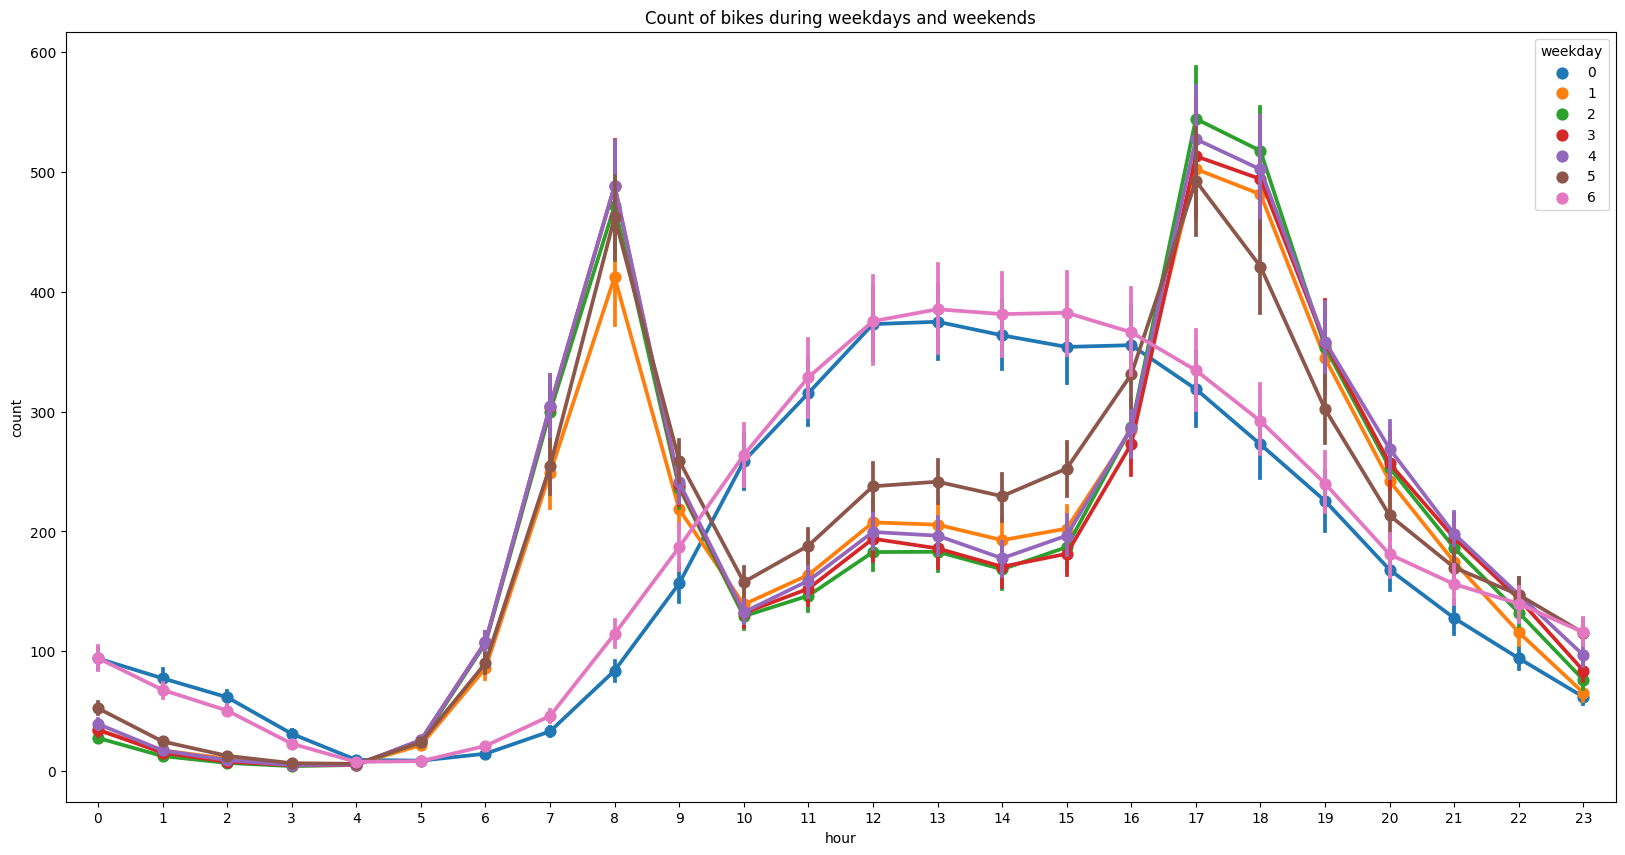

In [15]:
from ast import fix_missing_locations
from turtle import title


fig,ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = df, x='hour',y='count',hue = 'weekday',ax =ax)
ax.set(title= "Count of bikes during weekdays and weekends")

In [16]:
##inference 
# On weekdays rented bikes were more in morning(6AM - 9 AM) & evening(4PM - 9PM)
# On weekends more bike rented in afternoon(10AM- 7PM)

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends : Unregistered users')]

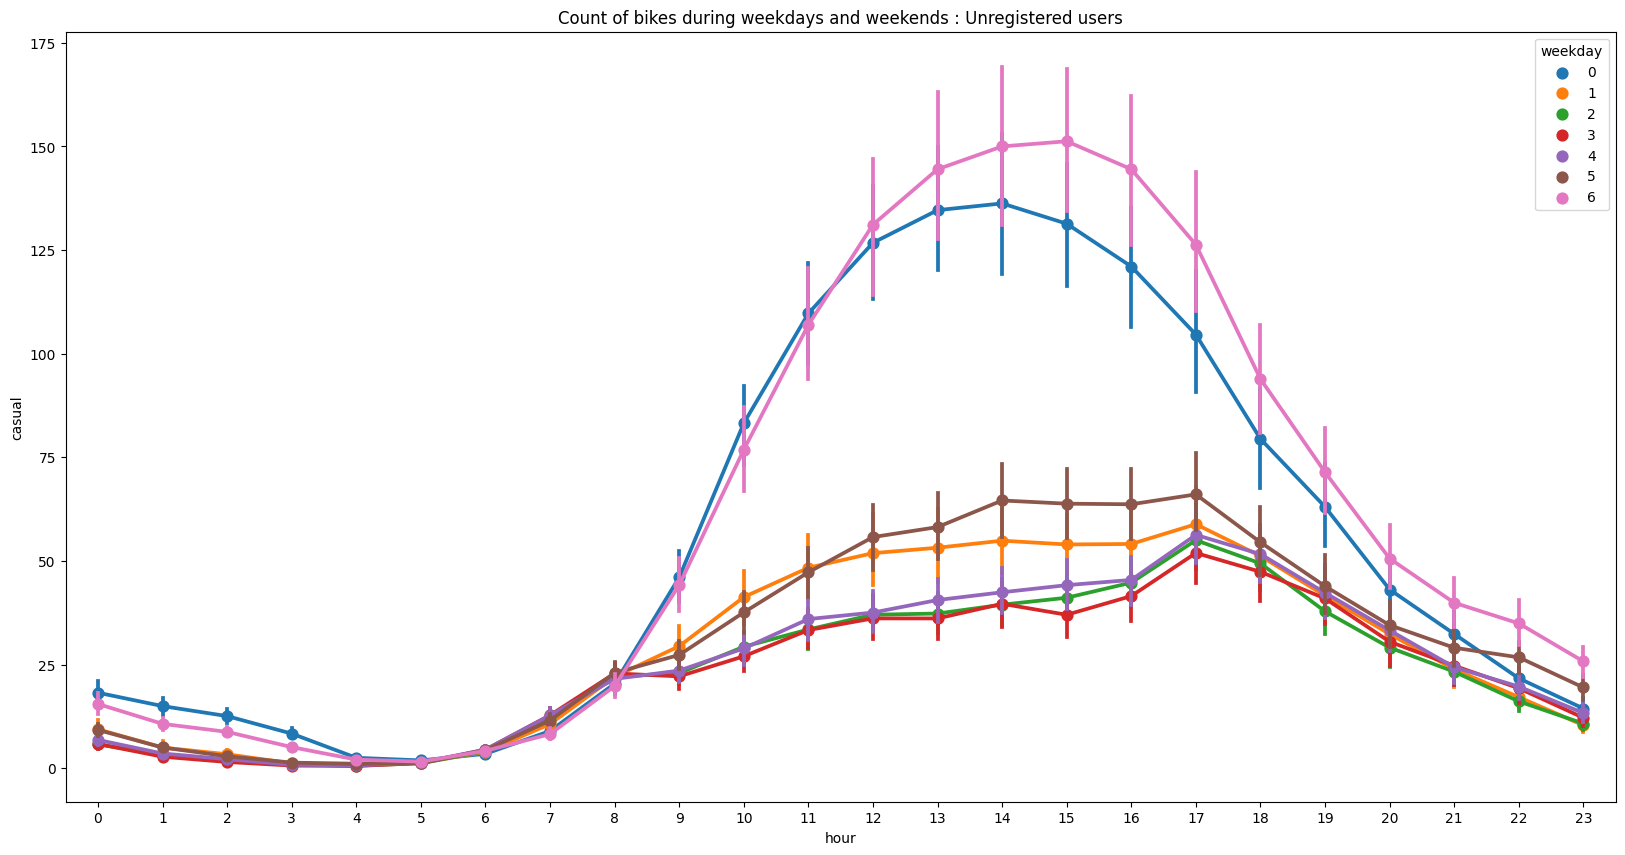

In [17]:
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = df,x='hour',y='casual', hue ='weekday', ax=ax)
ax.set(title="Count of bikes during weekdays and weekends : Unregistered users")

In [18]:
#Unregistered users uses rented bikes on weekends most

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends : Registered users')]

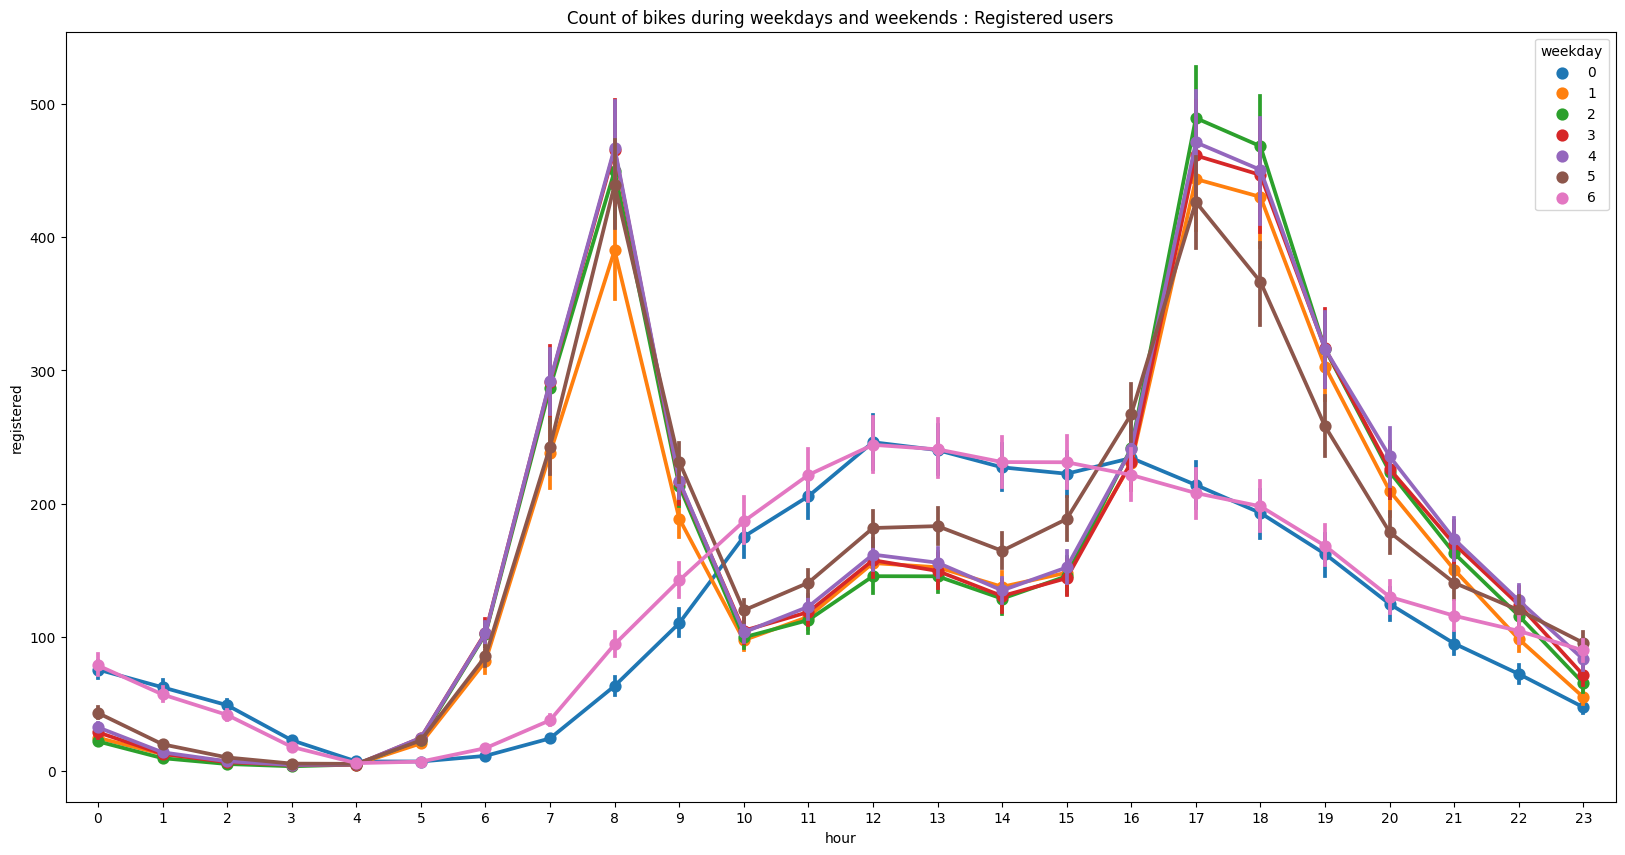

In [19]:
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = df,x='hour',y='registered', hue ='weekday', ax=ax)
ax.set(title="Count of bikes during weekdays and weekends : Registered users")

In [20]:
#Registered users uses rented bikes on weekdays most

[Text(0.5, 1.0, 'Count of bikes during different months')]

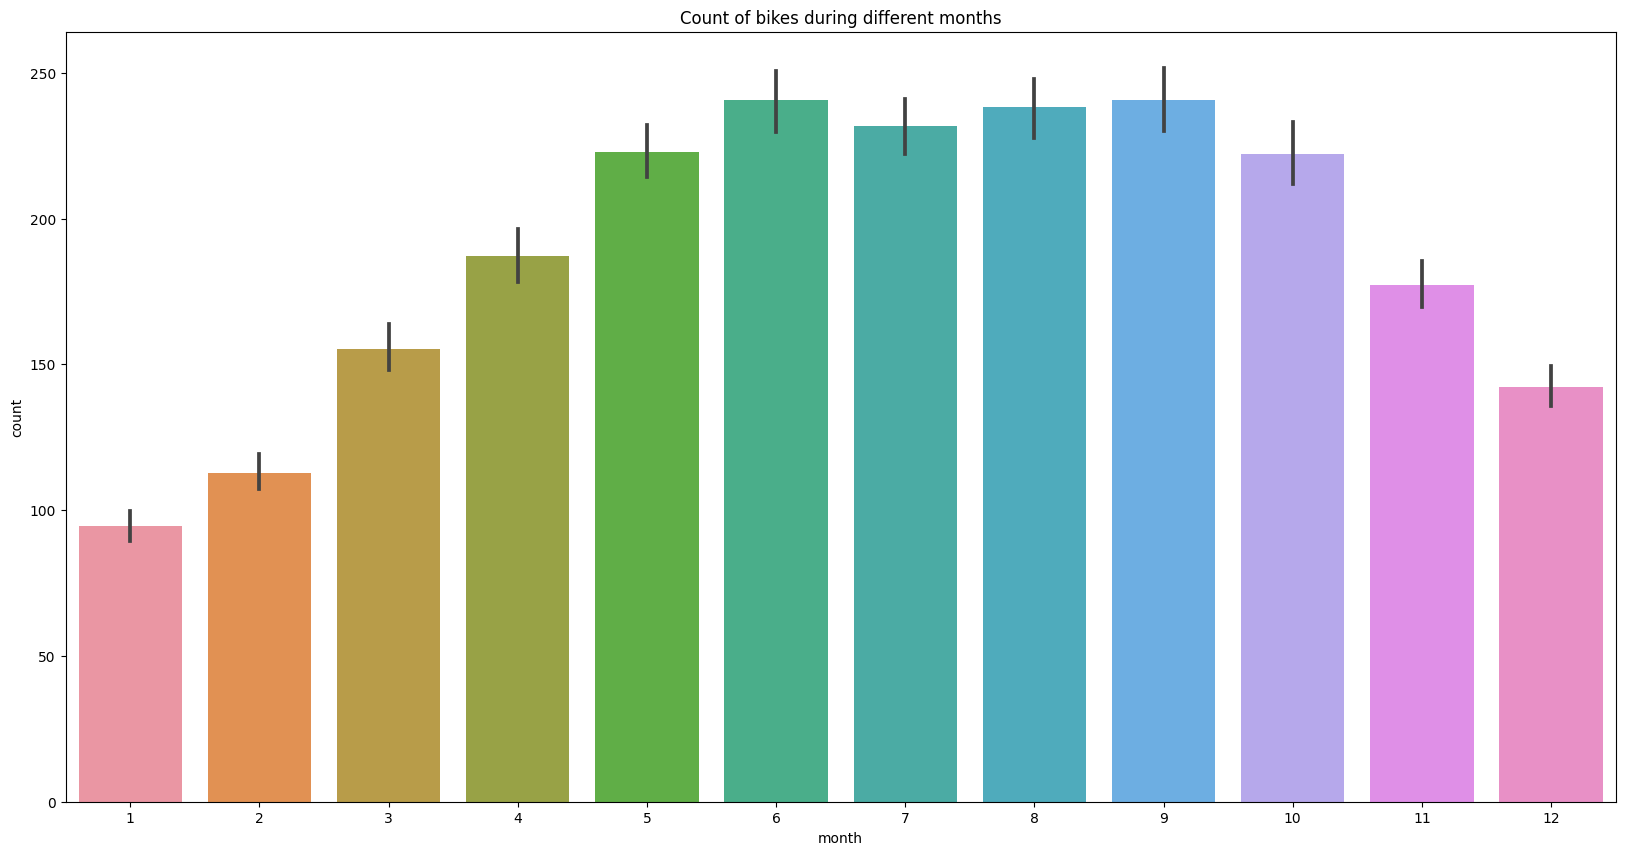

In [21]:
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='month',y='count',ax=ax)
ax.set(title="Count of bikes during different months")

In [23]:
#Less bikes were rented in winter season, otherwise it follows normal distribution

[Text(0.5, 1.0, 'NUMERICAL 8 COLS ONLY- [temp,atemp,humidity,windspeed,casual,registered]')]

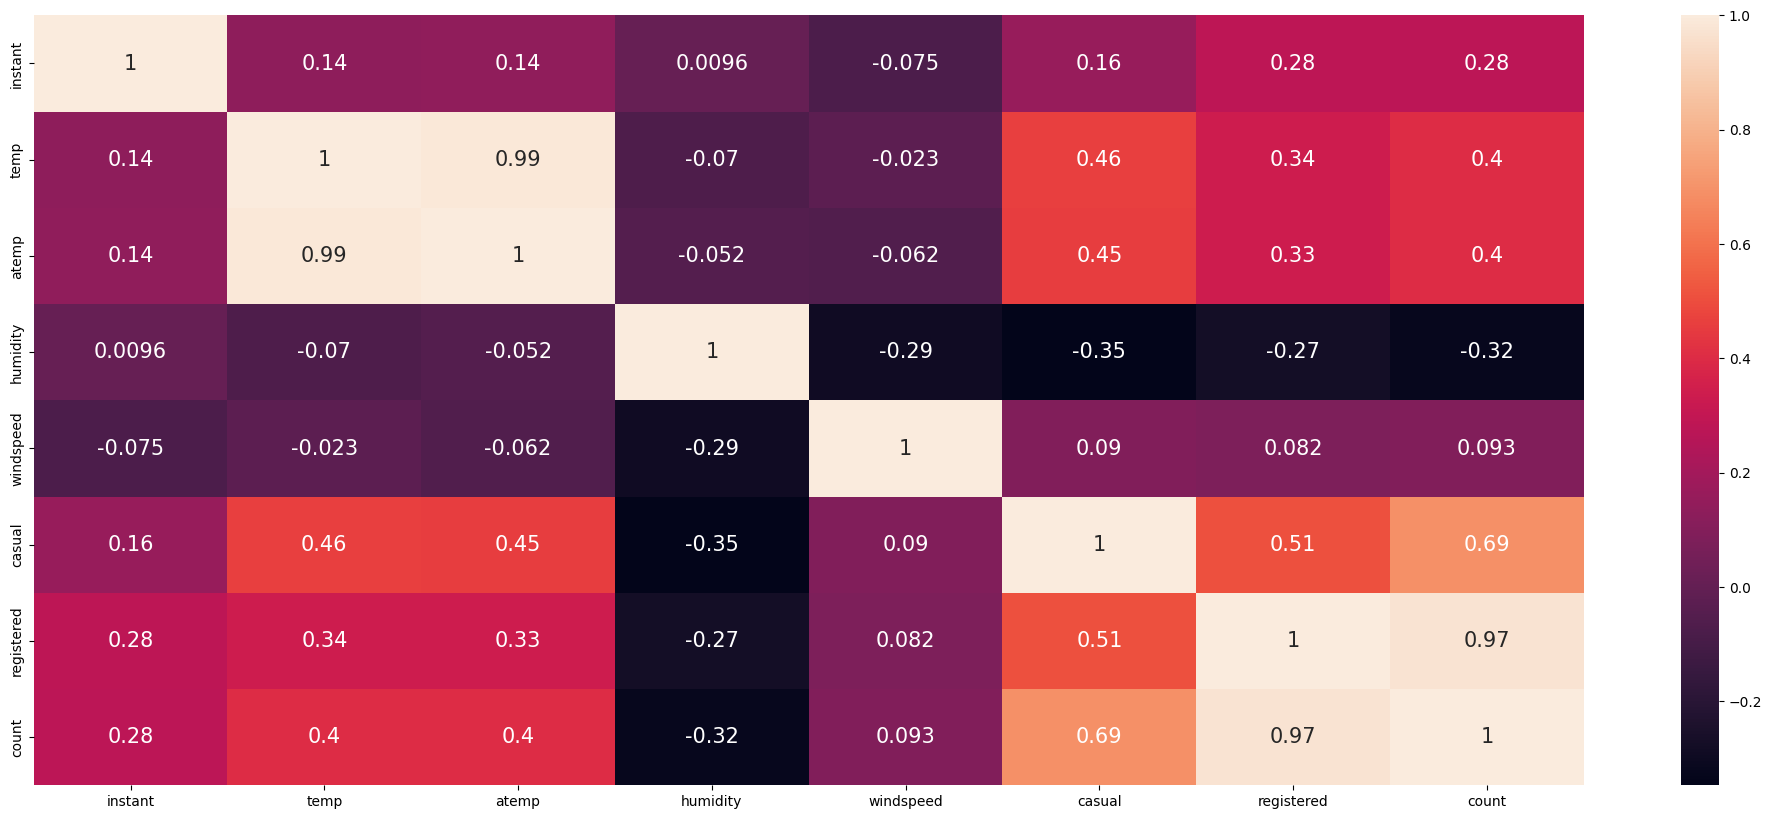

In [24]:
corr = df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot =True, annot_kws={'size':15})
ax.set(title="NUMERICAL 8 COLS ONLY- [temp,atemp,humidity,windspeed,casual,registered]")

In [25]:
# Registered is highly correlated with count
# Temp and atemp are highly correlated , hence we can delete one amoung them
# Windspeed is showing very less correlation with dependent column count,hence we can delete Windspeed
# casual + registered =count, so we can delete casual & registered to avoid multicollinearity

In [26]:
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


[Text(0.5, 1.0, 'Relation between temprature & users')]

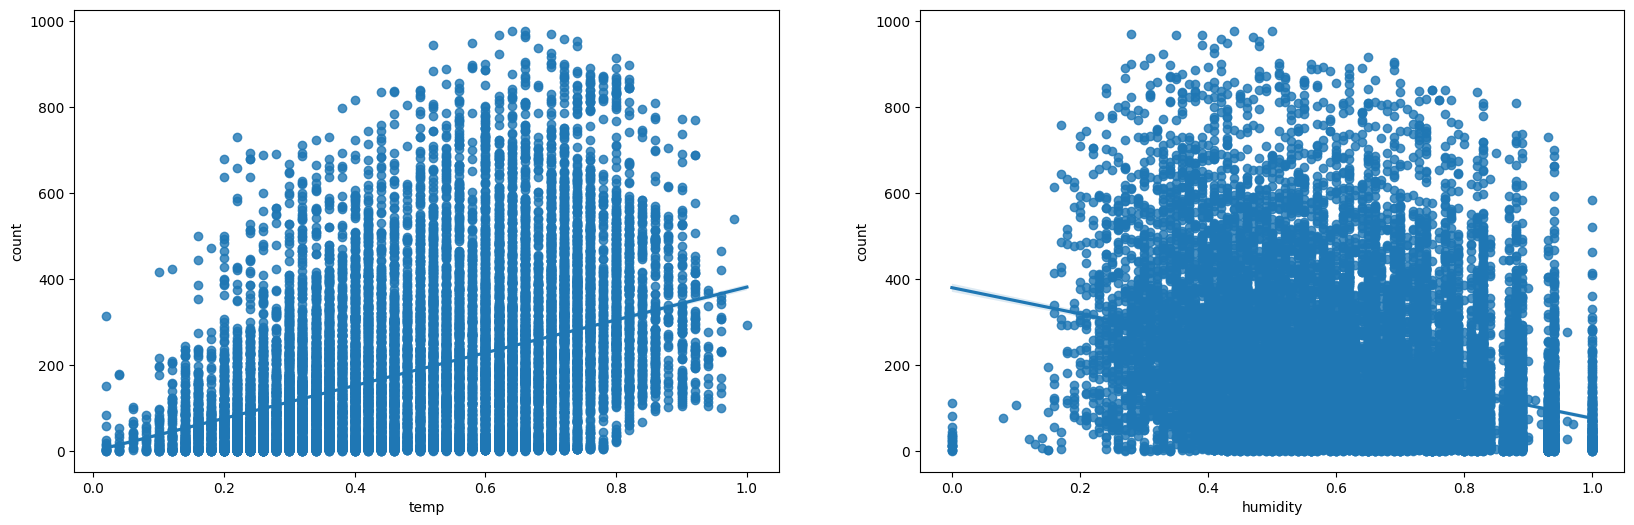

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (20,6))
sns.regplot(x = df['temp'], y = df['count'], ax=ax1)
ax.set(title="Relation between temprature & users")
sns.regplot(x=df['humidity'], y = df['count'],ax=ax2)
ax.set(title="Relation between temprature & users")

In [28]:
import scipy.stats as stats

c:\pyt\Rental-Bike-Share-Prediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


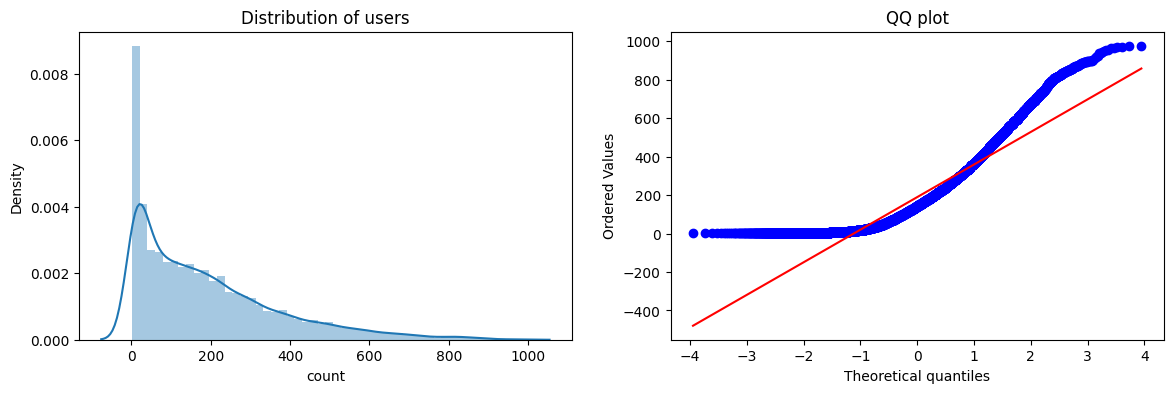

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['count'])
plt.title("Distribution of users")

plt.subplot(122)
stats.probplot(df['count'], dist = "norm",plot = plt)
plt.title("QQ plot")

plt.show()

c:\pyt\Rental-Bike-Share-Prediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


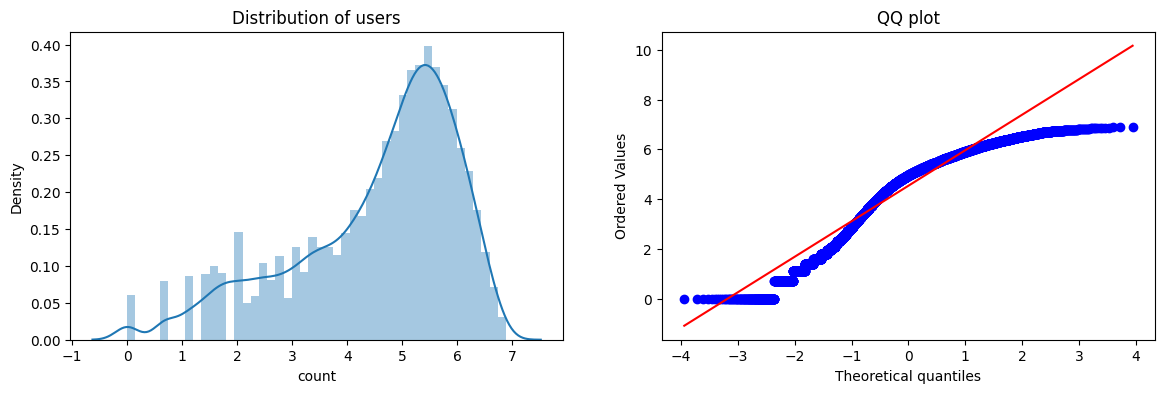

In [30]:
df['count'] = np.log(df['count'])

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['count'])
plt.title("Distribution of users")

plt.subplot(122)
stats.probplot(df['count'], dist = "norm",plot = plt)
plt.title("QQ plot")

plt.show()

In [31]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [32]:
df.drop(columns=['instant','atemp','casual','registered'],inplace=True)

In [33]:
df.columns

Index(['dteday', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [34]:
df.drop(columns=["dteday"],inplace=True)

In [35]:
df.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [36]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0.000000


In [37]:
df.to_csv("hour_updated.csv",index=False)